In [303]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

# Random Forest

### Classification Data Preprocessing

In [305]:
wine_data = pd.read_csv('WineQT.csv')

X= wine_data.drop(columns=['quality','Id'])
y=wine_data['quality']
y= y.replace([3, 4, 5], 0).replace([6, 7, 8], 1)
X=X.to_numpy()
y=y.to_numpy()

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_cl = scaler.fit_transform(X_train_cl)
X_test_cl = scaler.transform(X_test_cl)

### RandomForestClassifier

In [306]:
class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=20, max_features='sqrt', sample_fraction=0.75, bootstrap=True):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.sample_fraction = sample_fraction
        self.max_features = max_features
        self.bootstrap=bootstrap
        self.trees = []

    def fit(self, X, y):
        self.trees=[]
        for i in range(self.n_estimators):
            if self.bootstrap:
                indices = np.random.choice(len(X), size=int(self.sample_fraction * len(X)), replace=True)
            else:
                indices = np.random.choice(len(X), size=int(self.sample_fraction * len(X)), replace=False)
             
            sampled_X = X[indices]
            sampled_y = y[indices]
            model = DecisionTreeClassifier(max_depth=self.max_depth,max_features=self.max_features)
            model.fit(sampled_X, sampled_y)
            self.trees.append(model)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        result= np.array([0 if np.sum(column == 0) > np.sum(column == 1) else 1 for column in predictions.T])
        return result      

In [307]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_cl, y_train_cl)

predictions = random_forest.predict(X_test_cl)
print(accuracy_score(y_test_cl, predictions))

0.7816593886462883


### Hyperparameter Tuning of RandomForestClassifier

In [308]:
from prettytable import PrettyTable

n_estimators=[50,100,200,500]
fraction_samples=[0.15,0.25,0.5,0.75,1]
max_features=[1,2,3,4,5,6,7,8,9,10,11]
bootstraps=[True,False]

table_cl = PrettyTable()
table_cl.field_names = ['n_estimators','fraction_samples','max_features','bootstrap','accuracy']

accuracies_cl={}
best_hyperparameters_cl=tuple()
best_accuracy_cl=0

for n_estimator in n_estimators:
    for fraction_sample in fraction_samples:
        for max_feature in max_features:
            for bootstrap in bootstraps:
                hyperparameters=(n_estimator,fraction_sample,max_feature,bootstrap)
                random_forest = RandomForestClassifier(n_estimators=n_estimator,max_features=max_feature,bootstrap=bootstrap,sample_fraction=fraction_sample)
                random_forest.fit(X_train_cl, y_train_cl)
                predictions = random_forest.predict(X_test_cl)
                accuracy=accuracy_score(y_test_cl,predictions)
                if(accuracy>best_accuracy_cl):
                    best_hyperparameters_cl=hyperparameters
                    best_accuracy_cl=accuracy
                accuracies_cl[hyperparameters]=accuracy
                table_cl.add_row([n_estimator,fraction_sample,max_feature,bootstrap,accuracy])
                print(hyperparameters,accuracy)

(50, 0.15, 1, True) 0.7510917030567685
(50, 0.15, 1, False) 0.7641921397379913
(50, 0.15, 2, True) 0.7336244541484717
(50, 0.15, 2, False) 0.7685589519650655
(50, 0.15, 3, True) 0.7292576419213974
(50, 0.15, 3, False) 0.7729257641921398


(50, 0.15, 4, True) 0.7554585152838428
(50, 0.15, 4, False) 0.7641921397379913
(50, 0.15, 5, True) 0.7554585152838428
(50, 0.15, 5, False) 0.777292576419214
(50, 0.15, 6, True) 0.7903930131004366
(50, 0.15, 6, False) 0.7729257641921398
(50, 0.15, 7, True) 0.777292576419214
(50, 0.15, 7, False) 0.7903930131004366
(50, 0.15, 8, True) 0.777292576419214
(50, 0.15, 8, False) 0.759825327510917
(50, 0.15, 9, True) 0.7554585152838428
(50, 0.15, 9, False) 0.7903930131004366
(50, 0.15, 10, True) 0.7379912663755459
(50, 0.15, 10, False) 0.7685589519650655
(50, 0.15, 11, True) 0.7554585152838428
(50, 0.15, 11, False) 0.7729257641921398
(50, 0.25, 1, True) 0.7336244541484717
(50, 0.25, 1, False) 0.74235807860262
(50, 0.25, 2, True) 0.7729257641921398
(50, 0.25, 2, False) 0.7729257641921398
(50, 0.25, 3, True) 0.7554585152838428
(50, 0.25, 3, False) 0.7729257641921398
(50, 0.25, 4, True) 0.7816593886462883
(50, 0.25, 4, False) 0.7903930131004366
(50, 0.25, 5, True) 0.777292576419214
(50, 0.25, 5, Fa

In [309]:
print(table_cl)

+--------------+------------------+--------------+-----------+--------------------+
| n_estimators | fraction_samples | max_features | bootstrap |      accuracy      |
+--------------+------------------+--------------+-----------+--------------------+
|      50      |       0.15       |      1       |    True   | 0.7510917030567685 |
|      50      |       0.15       |      1       |   False   | 0.7641921397379913 |
|      50      |       0.15       |      2       |    True   | 0.7336244541484717 |
|      50      |       0.15       |      2       |   False   | 0.7685589519650655 |
|      50      |       0.15       |      3       |    True   | 0.7292576419213974 |
|      50      |       0.15       |      3       |   False   | 0.7729257641921398 |
|      50      |       0.15       |      4       |    True   | 0.7554585152838428 |
|      50      |       0.15       |      4       |   False   | 0.7641921397379913 |
|      50      |       0.15       |      5       |    True   | 0.75545851528

### Best Hyperparameters of RandomForestClassifier

In [310]:
print('Best Hyperparameters :',best_hyperparameters_cl)
print('Accuracy :',best_accuracy_cl)

Best Hyperparameters : (100, 1, 2, True)
Accuracy : 0.8165938864628821


### Regression Data Preprocessing

In [311]:
housing_data = pd.read_csv('HousingData.csv')

housing_data.fillna(housing_data.mean(), inplace=True)

X= housing_data.drop(columns=['MEDV'])
y=housing_data['MEDV']
X=X.to_numpy()
y=y.to_numpy()

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

### RandomForestRegressor

In [312]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=20, max_features='sqrt', sample_fraction=0.75, bootstrap=True):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.sample_fraction = sample_fraction
        self.max_features = max_features
        self.bootstrap=bootstrap
        self.trees = []

    def fit(self, X, y):
        self.trees=[]
        for i in range(self.n_estimators):
            if self.bootstrap:
                indices = np.random.choice(len(X), size=int(self.sample_fraction * len(X)), replace=True)
            else:
                indices = np.random.choice(len(X), size=int(self.sample_fraction * len(X)), replace=False)
             
            sampled_X = X[indices]
            sampled_y = y[indices]
            model = DecisionTreeRegressor(max_depth=self.max_depth,max_features=self.max_features)
            model.fit(sampled_X, sampled_y)
            self.trees.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.trees])
        y_pred = np.mean(predictions,axis=0)
        return y_pred 

In [313]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train_reg, y_train_reg)

predictions = random_forest.predict(X_test_reg)
print(r2_score(y_test_reg, predictions))

0.8372539362523088


### Hyperparameter Tuning of RandomForestRegressor

In [314]:
from prettytable import PrettyTable

n_estimators=[50,100,200,500]
fraction_samples=[0.15,0.25,0.5,0.75,1]
max_features=[1,2,3,4,5,6,7,8,9,10,11,12,13]
bootstraps=[True,False]

table_reg = PrettyTable()
table_reg.field_names = ['n_estimators','fraction_samples','max_features','bootstrap','r2_score']

r2_scores_reg={}
best_hyperparameters_reg=tuple()
best_r2_reg=0

for n_estimator in n_estimators:
    for fraction_sample in fraction_samples:
        for max_feature in max_features:
            for bootstrap in bootstraps:
                hyperparameters=(n_estimator,fraction_sample,max_feature,bootstrap)
                random_forest = RandomForestRegressor(n_estimators=n_estimator,max_features=max_feature,bootstrap=bootstrap,sample_fraction=fraction_sample)
                random_forest.fit(X_train_reg, y_train_reg)
                predictions = random_forest.predict(X_test_reg)
                r2=r2_score(y_test_reg,predictions)
                if(r2>best_r2_reg):
                        best_hyperparameters_reg=hyperparameters
                        best_r2_reg=r2
                r2_scores_reg[hyperparameters]=r2
                table_reg.add_row([n_estimator,fraction_sample,max_feature,bootstrap,r2])
                print(hyperparameters,r2)

(50, 0.15, 1, True) 0.6827195775269665
(50, 0.15, 1, False) 0.6679778194724391


(50, 0.15, 2, True) 0.7037086905058829
(50, 0.15, 2, False) 0.7383966272042585
(50, 0.15, 3, True) 0.7601827408021242
(50, 0.15, 3, False) 0.7289638276877703
(50, 0.15, 4, True) 0.7828928852056614
(50, 0.15, 4, False) 0.7826697806743337
(50, 0.15, 5, True) 0.7872617597115292
(50, 0.15, 5, False) 0.7656822048938053
(50, 0.15, 6, True) 0.7636497984472369
(50, 0.15, 6, False) 0.7773776486764697
(50, 0.15, 7, True) 0.7910959820308913
(50, 0.15, 7, False) 0.7822332735992313
(50, 0.15, 8, True) 0.7965109893704034
(50, 0.15, 8, False) 0.794843037048374
(50, 0.15, 9, True) 0.8025386404301134
(50, 0.15, 9, False) 0.8188225748107665
(50, 0.15, 10, True) 0.8015830343826118
(50, 0.15, 10, False) 0.7983098467672087
(50, 0.15, 11, True) 0.8067906638701008
(50, 0.15, 11, False) 0.8053560975322287
(50, 0.15, 12, True) 0.8190006478599287
(50, 0.15, 12, False) 0.8057884876167722
(50, 0.15, 13, True) 0.8002401013474926
(50, 0.15, 13, False) 0.8157399152121249
(50, 0.25, 1, True) 0.7442855169212632
(50, 0

In [315]:
print(table_reg)

+--------------+------------------+--------------+-----------+--------------------+
| n_estimators | fraction_samples | max_features | bootstrap |      r2_score      |
+--------------+------------------+--------------+-----------+--------------------+
|      50      |       0.15       |      1       |    True   | 0.6827195775269665 |
|      50      |       0.15       |      1       |   False   | 0.6679778194724391 |
|      50      |       0.15       |      2       |    True   | 0.7037086905058829 |
|      50      |       0.15       |      2       |   False   | 0.7383966272042585 |
|      50      |       0.15       |      3       |    True   | 0.7601827408021242 |
|      50      |       0.15       |      3       |   False   | 0.7289638276877703 |
|      50      |       0.15       |      4       |    True   | 0.7828928852056614 |
|      50      |       0.15       |      4       |   False   | 0.7826697806743337 |
|      50      |       0.15       |      5       |    True   | 0.78726175971

### Best Hyperparameters of RandomForestRegressor

In [316]:
print('Best Hyperparameters :',best_hyperparameters_reg)
print('r2_score :',best_r2_reg)

Best Hyperparameters : (50, 0.75, 13, False)
r2_score : 0.9191099207817998


# AdaBoost Decision Trees 

In [317]:
y_train_cl_ada=np.where(y_train_cl==0,-1,y_train_cl)
y_test_cl_ada=np.where(y_test_cl==0,-1,y_test_cl)

### AdaBoostClassifier

In [318]:
class AdaBoostClassifier:
    def __init__(self, n_estimators=50, max_depth=3):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples
        self.alphas = []
        self.models = []

        for i in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X, y, sample_weight=weights)
            y_pred = model.predict(X)

            err = np.sum(weights * (y_pred != y)) / np.sum(weights)
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))
            weights *= np.exp(-alpha * y * y_pred)
            weights /= np.sum(weights)
            
            self.models.append(model)
            self.alphas.append(alpha)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        y_pred = np.sign(np.dot(self.alphas, predictions))
        return y_pred

In [319]:
adaboost_classifier = AdaBoostClassifier(n_estimators=50,max_depth=8)
adaboost_classifier.fit(X_train_cl, y_train_cl_ada)
y_pred = adaboost_classifier.predict(X_test_cl)
print(accuracy_score(y_test_cl_ada, y_pred))

0.7729257641921398


### Hyperparameter Tuning of AdaBoostClassifier

In [320]:
from prettytable import PrettyTable

n_estimators=[50,100,200,500]
max_depths=[1,2,3,4,5,6,7,8,9,10]

table_cl = PrettyTable()
table_cl.field_names = ['n_estimators','max_depth','accuracy']

accuracies_cl={}
best_hyperparameters_cl=tuple()
best_accuracy_cl=0

for n_estimator in n_estimators:
    for max_depth in max_depths:
        hyperparameters=(n_estimator,max_depth)
        adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimator,max_depth=max_depth)
        adaboost_classifier.fit(X_train_cl, y_train_cl_ada)
        predictions = adaboost_classifier.predict(X_test_cl)
        accuracy=accuracy_score(y_test_cl_ada,predictions)
        if(accuracy>best_accuracy_cl):
            best_hyperparameters_cl=hyperparameters
            best_accuracy_cl=accuracy
        accuracies_cl[hyperparameters]=accuracy
        table_cl.add_row([n_estimator,max_depth,accuracy])
        print(hyperparameters,accuracy)

(50, 1) 0.7205240174672489


(50, 2) 0.7641921397379913
(50, 3) 0.7292576419213974
(50, 4) 0.6986899563318777
(50, 5) 0.7161572052401747
(50, 6) 0.7729257641921398
(50, 7) 0.7379912663755459
(50, 8) 0.7685589519650655
(50, 9) 0.7860262008733624
(50, 10) 0.74235807860262
(100, 1) 0.7379912663755459
(100, 2) 0.7729257641921398
(100, 3) 0.7554585152838428
(100, 4) 0.7510917030567685
(100, 5) 0.7336244541484717
(100, 6) 0.7991266375545851
(100, 7) 0.7248908296943232
(100, 8) 0.7729257641921398
(100, 9) 0.7641921397379913
(100, 10) 0.7860262008733624
(200, 1) 0.7554585152838428
(200, 2) 0.7641921397379913
(200, 3) 0.7336244541484717
(200, 4) 0.7554585152838428
(200, 5) 0.777292576419214
(200, 6) 0.7729257641921398
(200, 7) 0.7641921397379913
(200, 8) 0.7467248908296943
(200, 9) 0.7816593886462883
(200, 10) 0.7729257641921398
(500, 1) 0.7510917030567685
(500, 2) 0.7554585152838428
(500, 3) 0.7336244541484717
(500, 4) 0.777292576419214
(500, 5) 0.759825327510917
(500, 6) 0.7729257641921398
(500, 7) 0.7554585152838428
(50

In [321]:
print(table_cl)

+--------------+-----------+--------------------+
| n_estimators | max_depth |      accuracy      |
+--------------+-----------+--------------------+
|      50      |     1     | 0.7205240174672489 |
|      50      |     2     | 0.7641921397379913 |
|      50      |     3     | 0.7292576419213974 |
|      50      |     4     | 0.6986899563318777 |
|      50      |     5     | 0.7161572052401747 |
|      50      |     6     | 0.7729257641921398 |
|      50      |     7     | 0.7379912663755459 |
|      50      |     8     | 0.7685589519650655 |
|      50      |     9     | 0.7860262008733624 |
|      50      |     10    |  0.74235807860262  |
|     100      |     1     | 0.7379912663755459 |
|     100      |     2     | 0.7729257641921398 |
|     100      |     3     | 0.7554585152838428 |
|     100      |     4     | 0.7510917030567685 |
|     100      |     5     | 0.7336244541484717 |
|     100      |     6     | 0.7991266375545851 |
|     100      |     7     | 0.7248908296943232 |


### Best Hyperparameters of AdaBoostClassifier

In [322]:
print('Best Hyperparameters :',best_hyperparameters_cl)
print('Accuracy :',best_accuracy_cl)

Best Hyperparameters : (100, 6)
Accuracy : 0.7991266375545851


### AdaBoostClassifier Regressor

In [323]:
def weighted_median(values, weights):
    sorted_indices = values.argsort()
    values = values[sorted_indices]
    weights = weights[sorted_indices]
    weights_cumulative_sum = weights.cumsum()
    median_weight = np.argmax(weights_cumulative_sum >= sum(weights)/2)
    return values[median_weight]

class AdaBoostRegressor:
    def __init__(self, n_estimators=50, max_depth=3):
        self.n_estimators = n_estimators
        self.max_depth = max_depth

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples
        self.models = []
        self.fitted_values = np.empty((n_samples, self.n_estimators))
        self.betas = []
        
        for i in range(self.n_estimators):
            indices = np.random.choice(
                np.arange(n_samples), size=n_samples, replace=True, p=weights)
            sampled_X = X[indices]
            sampled_y = y[indices]

            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(sampled_X, sampled_y)
            self.models.append(model)
            y_pred = model.predict(X)
            self.fitted_values[:, i] = y_pred

            D_t = np.max(np.abs(y - y_pred))
            observation_error = np.abs(y - y_pred)/D_t

            model_error = np.sum(weights*observation_error)
            if model_error >= 0.5:
                self.n_estimators = i - 1
                self.fitted_values = self.fitted_values[:, :i-1]
                self.models = self.models[:i-1]
                break

            beta_t = model_error/(1 - model_error)
            self.betas.append(beta_t)

            Z_t = np.sum(weights*beta_t**(1-observation_error))
            weights *= beta_t**(1-observation_error)/Z_t

        self.model_weights = np.log(1/np.array(self.betas))
        self.y_train_hat = np.array([weighted_median(
            self.fitted_values[n], self.model_weights) for n in range(n_samples)])

    def predict(self, X):
        n_samples = X.shape[0]
        fitted_values = np.empty((n_samples, self.n_estimators))
        for t, tree in enumerate(self.models):
            fitted_values[:, t] = tree.predict(X)
        return np.array([weighted_median(fitted_values[n], self.model_weights) for n in range(n_samples)])

Referred https://dafriedman97.github.io/mlbook/content/c6/s2/boosting.html

In [324]:
adaboost_regressor = AdaBoostRegressor(n_estimators=50, max_depth=4)
adaboost_regressor.fit(X_train_reg, y_train_reg)
y_pred = adaboost_regressor.predict(X_test_reg)
print(r2_score(y_test_reg, y_pred))

0.8972518340692215


### Hyperparameter Tuning of AdaBoostRegressor

In [325]:
from prettytable import PrettyTable

n_estimators=[50,100,200,500]
max_depths=[1,2,3,4,5,6,7,8,9,10]

table_reg = PrettyTable()
table_reg.field_names = ['n_estimators','max_depth','r2_score']

r2_scores_reg={}
best_hyperparameters_reg=tuple()
best_r2_reg=0

for n_estimator in n_estimators:
    for max_depth in max_depths:
        hyperparameters=(n_estimator,max_depth)
        adaboost_regressor = AdaBoostRegressor(n_estimators=n_estimator, max_depth=max_depth)
        adaboost_regressor.fit(X_train_reg, y_train_reg)
        predictions = adaboost_regressor.predict(X_test_reg)
        r2=r2_score(y_test_reg,predictions)
        if(r2>best_r2_reg):
            best_hyperparameters_reg=hyperparameters
            best_r2_reg=r2
        r2_scores_reg[hyperparameters]=r2
        table_reg.add_row([n_estimator,max_depth,r2])
        print(hyperparameters,r2)

(50, 1) 0.5757329027891958
(50, 2) 0.8259812723221968


(50, 3) 0.8449079719200865
(50, 4) 0.8517118835319586
(50, 5) 0.8647124170778414
(50, 6) 0.9100219277470672
(50, 7) 0.9122595699948643
(50, 8) 0.9113861355589
(50, 9) 0.9071862696112971
(50, 10) 0.9072950627407999
(100, 1) 0.5161102684497958
(100, 2) 0.7826463114359807
(100, 3) 0.830119784709067
(100, 4) 0.9009944416136317
(100, 5) 0.8616275610198737
(100, 6) 0.908302656095592
(100, 7) 0.9132254157046207
(100, 8) 0.9113962188079427
(100, 9) 0.9092065328462363
(100, 10) 0.8624441321054318
(200, 1) 0.579066900531024
(200, 2) 0.7889515647728371
(200, 3) 0.832110870304551
(200, 4) 0.8676806915215491
(200, 5) 0.8672822720610165
(200, 6) 0.9131007274590425
(200, 7) 0.9101348672455891
(200, 8) 0.9110103673500605
(200, 9) 0.9117903494458335
(200, 10) 0.913463646476811
(500, 1) 0.565815535810277
(500, 2) 0.7854466030848086
(500, 3) 0.8404268488249763
(500, 4) 0.8589380389973826
(500, 5) 0.860942838119646
(500, 6) 0.9107440040956402
(500, 7) 0.9122556565340151
(500, 8) 0.9140969537851854
(500, 9

In [326]:
print(table_reg)

+--------------+-----------+--------------------+
| n_estimators | max_depth |      r2_score      |
+--------------+-----------+--------------------+
|      50      |     1     | 0.5757329027891958 |
|      50      |     2     | 0.8259812723221968 |
|      50      |     3     | 0.8449079719200865 |
|      50      |     4     | 0.8517118835319586 |
|      50      |     5     | 0.8647124170778414 |
|      50      |     6     | 0.9100219277470672 |
|      50      |     7     | 0.9122595699948643 |
|      50      |     8     |  0.9113861355589   |
|      50      |     9     | 0.9071862696112971 |
|      50      |     10    | 0.9072950627407999 |
|     100      |     1     | 0.5161102684497958 |
|     100      |     2     | 0.7826463114359807 |
|     100      |     3     | 0.830119784709067  |
|     100      |     4     | 0.9009944416136317 |
|     100      |     5     | 0.8616275610198737 |
|     100      |     6     | 0.908302656095592  |
|     100      |     7     | 0.9132254157046207 |


### Best Hyperparameters of AdaBoostRegressor

In [327]:
print('Best Hyperparameters :',best_hyperparameters_reg)
print('r2_score :',best_r2_reg)

Best Hyperparameters : (500, 8)
r2_score : 0.9140969537851854


# Gradient Boosted Decision Trees

### GradientBoostedDecisionTreeClassifier

In [328]:
class GradientBoostedDecisionTreeClassifier:
    def __init__(self, n_estimators=50, max_depth=3,learning_rate=0.15):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate=learning_rate
    
    def fit(self, X, y):
        n_samples=X.shape[0]
        self.models=[]
        self.initial_log_odds=np.log(np.count_nonzero(y==1)/np.count_nonzero(y==0))
        log_odds=np.full(n_samples,self.initial_log_odds)
        predicted_probability=np.exp(log_odds)/(1+np.exp(log_odds))
        for i in range(self.n_estimators):
            residuals=y-predicted_probability
            model=DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X,residuals)
            leaf_indices = model.apply(X)
            numerator={}
            denominator={}
            for i in np.unique(leaf_indices):
                numerator[i]=0
                denominator[i]=0
            for i in range(n_samples):
                numerator[leaf_indices[i]]+=residuals[i]
                denominator[leaf_indices[i]]+=predicted_probability[i]*(1-predicted_probability[i])
            for i in np.unique(leaf_indices):
                leaf_value=numerator[i]/denominator[i]
                model.tree_.value[i, 0, 0] = leaf_value
            self.models.append(model)
            residuals_pred=model.predict(X)
            log_odds+=self.learning_rate*residuals_pred
            predicted_probability=np.exp(log_odds)/(1+np.exp(log_odds))

    def predict(self,X):
        log_odds=np.full(X.shape[0],self.initial_log_odds)
        for model in self.models:
            log_odds+=self.learning_rate*model.predict(X)
        predicted_probability=np.exp(log_odds)/(1+np.exp(log_odds))
        y_pred=np.where(predicted_probability<0.5,0,1)
        return y_pred

Referred https://www.youtube.com/watch?v=hjxgoUJ_va8

In [329]:
gradientboost_classifier = GradientBoostedDecisionTreeClassifier(n_estimators=100, max_depth=10)
gradientboost_classifier.fit(X_train_cl, y_train_cl)
y_pred = gradientboost_classifier.predict(X_test_cl)
accuracy_score(y_test_cl, y_pred)

0.7510917030567685

### Hyperparameter Tuning of GradientBoostedDecisionTreeClassifier

In [330]:
from prettytable import PrettyTable

learning_rate=[0.01,0.1,0.15,0.2,0.5]
n_estimators=[50,100,200,500]
max_depths=[3,5,10,15,20]

table_cl = PrettyTable()
table_cl.field_names = ['n_estimators','max_depth','learning_rate','accuracy']

accuracies_cl={}
best_hyperparameters_cl=tuple()
best_accuracy_cl=0

for lr in learning_rate:
    for n_estimator in n_estimators:
        for max_depth in max_depths:
            hyperparameters=(n_estimator,max_depth,lr)
            gradientboost_classifier = GradientBoostedDecisionTreeClassifier(n_estimators=n_estimator, max_depth=max_depth,learning_rate=lr)
            gradientboost_classifier.fit(X_train_cl, y_train_cl)
            predictions = gradientboost_classifier.predict(X_test_cl)
            accuracy=accuracy_score(y_test_cl,predictions)
            if(accuracy>best_accuracy_cl):
                best_hyperparameters_cl=hyperparameters
                best_accuracy_cl=accuracy
            accuracies_cl[hyperparameters]=accuracy
            table_cl.add_row([n_estimator,max_depth,lr,accuracy])
            print(hyperparameters,accuracy)

(50, 3, 0.01) 0.6943231441048034
(50, 5, 0.01) 0.6986899563318777
(50, 10, 0.01) 0.6943231441048034
(50, 15, 0.01) 0.7074235807860262
(50, 20, 0.01) 0.7074235807860262
(100, 3, 0.01) 0.7554585152838428
(100, 5, 0.01) 0.7816593886462883
(100, 10, 0.01) 0.6986899563318777
(100, 15, 0.01) 0.7161572052401747
(100, 20, 0.01) 0.7030567685589519
(200, 3, 0.01) 0.7510917030567685
(200, 5, 0.01) 0.7816593886462883
(200, 10, 0.01) 0.7161572052401747
(200, 15, 0.01) 0.7030567685589519
(200, 20, 0.01) 0.7030567685589519
(500, 3, 0.01) 0.7641921397379913
(500, 5, 0.01) 0.7860262008733624
(500, 10, 0.01) 0.7205240174672489
(500, 15, 0.01) 0.7117903930131004
(500, 20, 0.01) 0.7161572052401747
(50, 3, 0.1) 0.7685589519650655
(50, 5, 0.1) 0.7947598253275109
(50, 10, 0.1) 0.7510917030567685
(50, 15, 0.1) 0.7161572052401747
(50, 20, 0.1) 0.7074235807860262
(100, 3, 0.1) 0.759825327510917
(100, 5, 0.1) 0.7816593886462883
(100, 10, 0.1) 0.74235807860262
(100, 15, 0.1) 0.7117903930131004
(100, 20, 0.1) 0.71

In [331]:
print(table_cl)

+--------------+-----------+---------------+--------------------+
| n_estimators | max_depth | learning_rate |      accuracy      |
+--------------+-----------+---------------+--------------------+
|      50      |     3     |      0.01     | 0.6943231441048034 |
|      50      |     5     |      0.01     | 0.6986899563318777 |
|      50      |     10    |      0.01     | 0.6943231441048034 |
|      50      |     15    |      0.01     | 0.7074235807860262 |
|      50      |     20    |      0.01     | 0.7074235807860262 |
|     100      |     3     |      0.01     | 0.7554585152838428 |
|     100      |     5     |      0.01     | 0.7816593886462883 |
|     100      |     10    |      0.01     | 0.6986899563318777 |
|     100      |     15    |      0.01     | 0.7161572052401747 |
|     100      |     20    |      0.01     | 0.7030567685589519 |
|     200      |     3     |      0.01     | 0.7510917030567685 |
|     200      |     5     |      0.01     | 0.7816593886462883 |
|     200 

### Best Hyperparameters of GradientBoostedDecisionTreeClassifier

In [332]:
print('Best Hyperparameters :',best_hyperparameters_cl)
print('Accuracy :',best_accuracy_cl)

Best Hyperparameters : (100, 5, 0.2)
Accuracy : 0.8122270742358079


### GradientBoostedDecisionTreeRegressor

In [333]:
class GradientBoostedDecisionTreeRegressor:
    def __init__(self, n_estimators=50, max_depth=3,learning_rate=0.15):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate=learning_rate
    
    def fit(self, X, y):
        n_samples=X.shape[0]
        self.models=[]
        self.mean=np.mean(y)
        predictions=np.full(n_samples,self.mean)
        for i in range(self.n_estimators):
            residuals=y-predictions
            model=DecisionTreeRegressor(max_depth=self.max_depth)
            self.models.append(model)
            model.fit(X,residuals)
            residuals_pred=model.predict(X)
            predictions+=self.learning_rate*residuals_pred

    def predict(self,X):
        y_pred=self.mean
        for model in self.models:
            y_pred+=self.learning_rate*model.predict(X)
        return y_pred

Referred https://www.youtube.com/watch?v=zTXVo2Kmi8Q

In [334]:
gradientboost_regressor = GradientBoostedDecisionTreeRegressor(n_estimators=100, max_depth=3)
gradientboost_regressor.fit(X_train_reg, y_train_reg)
y_pred = gradientboost_regressor.predict(X_test_reg)
print(r2_score(y_test_reg, y_pred))

0.9034881140445613


### Hyperparameter Tuning of GradientBoostedDecisionTreeRegressor

In [335]:
from prettytable import PrettyTable

learning_rate=[0.01,0.1,0.15,0.2]
n_estimators=[50,100,200,500]
max_depths=[3,5,10,15,20]

table_reg = PrettyTable()
table_reg.field_names = ['n_estimators','max_depth','learning_rate','r2_score']

r2_scores_reg={}
best_hyperparameters_reg=tuple()
best_r2_reg=0

for lr in learning_rate:
    for n_estimator in n_estimators:
        for max_depth in max_depths:
            hyperparameters=(n_estimator,max_depth,lr)
            gradientboost_regressor = GradientBoostedDecisionTreeRegressor(n_estimators=n_estimator, max_depth=max_depth,learning_rate=lr)
            gradientboost_regressor.fit(X_train_reg, y_train_reg)
            predictions = gradientboost_regressor.predict(X_test_reg)
            r2=r2_score(y_test_reg,predictions)
            if(r2>best_r2_reg):
                best_hyperparameters_reg=hyperparameters
                best_r2_reg=r2
            r2_scores_reg[hyperparameters]=r2
            table_reg.add_row([n_estimator,max_depth,lr,r2])
            print(hyperparameters,r2)

(50, 3, 0.01) 0.5026382755037766
(50, 5, 0.01) 0.5595668301553831
(50, 10, 0.01) 0.5699062456255362
(50, 15, 0.01) 0.5638312678225217
(50, 20, 0.01) 0.5663154142930662
(100, 3, 0.01) 0.7133929051261317
(100, 5, 0.01) 0.7716682735920412
(100, 10, 0.01) 0.764259566074028
(100, 15, 0.01) 0.754028604342839
(100, 20, 0.01) 0.7489618781902135
(200, 3, 0.01) 0.8469167324031437
(200, 5, 0.01) 0.8925875223652787
(200, 10, 0.01) 0.8462608333293478
(200, 15, 0.01) 0.8271620634213614
(200, 20, 0.01) 0.8184514649173458
(500, 3, 0.01) 0.8989976336493924
(500, 5, 0.01) 0.9240903087208594
(500, 10, 0.01) 0.8498090658747259
(500, 15, 0.01) 0.8198893045040855
(500, 20, 0.01) 0.8067754332433855
(50, 3, 0.1) 0.9036158578621435
(50, 5, 0.1) 0.9170775939516428
(50, 10, 0.1) 0.8472359238943359
(50, 15, 0.1) 0.8236673806701179
(50, 20, 0.1) 0.8120364451630724
(100, 3, 0.1) 0.9050417940474664
(100, 5, 0.1) 0.9134571566086501
(100, 10, 0.1) 0.8450037379855846
(100, 15, 0.1) 0.813454536887581
(100, 20, 0.1) 0.80

In [336]:
print(table_reg)

+--------------+-----------+---------------+--------------------+
| n_estimators | max_depth | learning_rate |      r2_score      |
+--------------+-----------+---------------+--------------------+
|      50      |     3     |      0.01     | 0.5026382755037766 |
|      50      |     5     |      0.01     | 0.5595668301553831 |
|      50      |     10    |      0.01     | 0.5699062456255362 |
|      50      |     15    |      0.01     | 0.5638312678225217 |
|      50      |     20    |      0.01     | 0.5663154142930662 |
|     100      |     3     |      0.01     | 0.7133929051261317 |
|     100      |     5     |      0.01     | 0.7716682735920412 |
|     100      |     10    |      0.01     | 0.764259566074028  |
|     100      |     15    |      0.01     | 0.754028604342839  |
|     100      |     20    |      0.01     | 0.7489618781902135 |
|     200      |     3     |      0.01     | 0.8469167324031437 |
|     200      |     5     |      0.01     | 0.8925875223652787 |
|     200 

### Best Hyperparameters of GradientBoostedDecisionTreeRegressor

In [337]:
print('Best Hyperparameters :',best_hyperparameters_reg)
print('r2_score :',best_r2_reg)

Best Hyperparameters : (500, 5, 0.01)
r2_score : 0.9240903087208594


### Plot of accuracy vs number of estimators and training time vs number of estimators for Classification

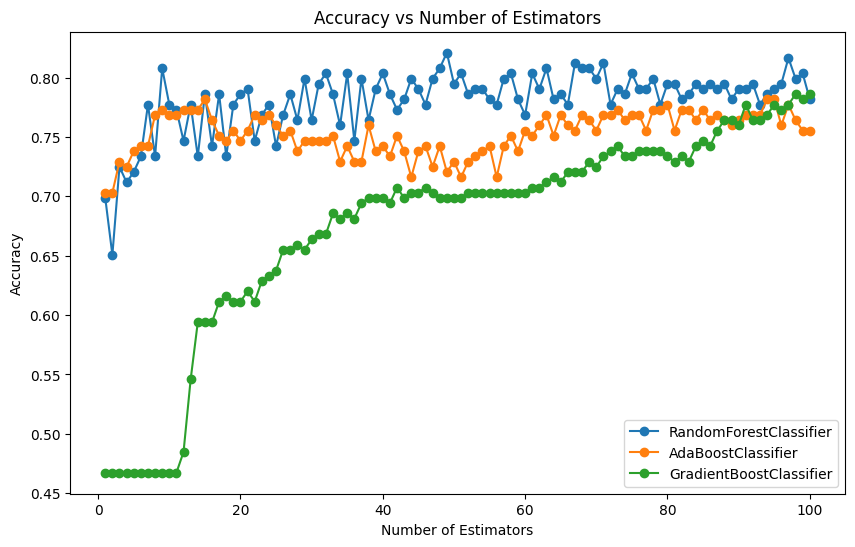

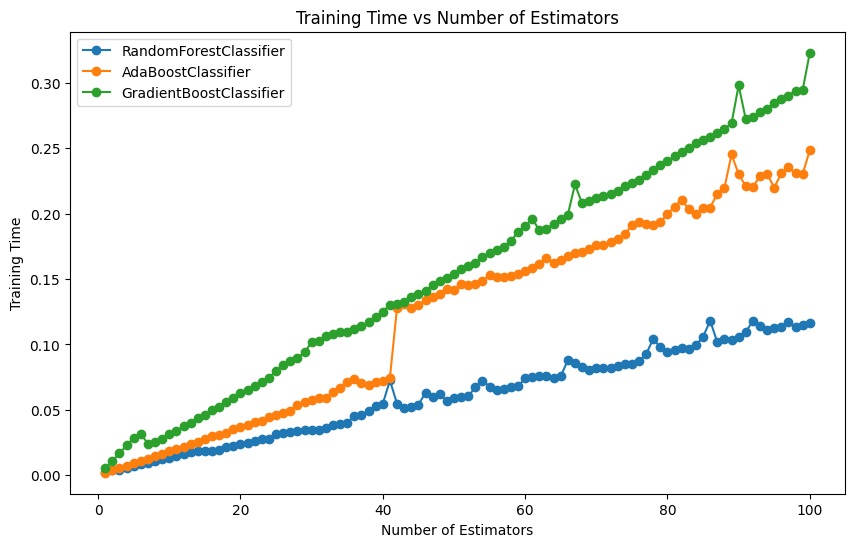

In [338]:
import time
import matplotlib.pyplot as plt

n_estimators=list(range(1,101))

accuracy_cl_rf=[]
training_time_cl_rf=[]

for n_estimator in n_estimators:
    random_forest = RandomForestClassifier(n_estimators=n_estimator)
    start=time.time()
    random_forest.fit(X_train_cl, y_train_cl)
    end=time.time()
    predictions = random_forest.predict(X_test_cl)
    accuracy=accuracy_score(y_test_cl,predictions)
    accuracy_cl_rf.append(accuracy)
    training_time_cl_rf.append(end-start)

accuracy_cl_ada=[]
training_time_cl_ada=[]

for n_estimator in n_estimators:
    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimator)
    start=time.time()
    adaboost_classifier.fit(X_train_cl, y_train_cl_ada)
    end=time.time()
    predictions = adaboost_classifier.predict(X_test_cl)
    accuracy=accuracy_score(y_test_cl_ada,predictions)
    accuracy_cl_ada.append(accuracy)
    training_time_cl_ada.append(end-start)

accuracy_cl_gb=[]
training_time_cl_gb=[]

for n_estimator in n_estimators:
    gradientboost_classifier = GradientBoostedDecisionTreeClassifier(n_estimators=n_estimator,max_depth=5,learning_rate=0.01)
    start=time.time()
    gradientboost_classifier.fit(X_train_cl, y_train_cl)
    end=time.time()
    predictions = gradientboost_classifier.predict(X_test_cl)
    accuracy=accuracy_score(y_test_cl,predictions)
    accuracy_cl_gb.append(accuracy)
    training_time_cl_gb.append(end-start)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracy_cl_rf, label='RandomForestClassifier', marker='o')
plt.plot(n_estimators, accuracy_cl_ada, label='AdaBoostClassifier', marker='o')
plt.plot(n_estimators, accuracy_cl_gb, label='GradientBoostClassifier', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, training_time_cl_rf, label='RandomForestClassifier', marker='o')
plt.plot(n_estimators, training_time_cl_ada, label='AdaBoostClassifier', marker='o')
plt.plot(n_estimators, training_time_cl_gb, label='GradientBoostClassifier', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Number of Estimators')
plt.legend()
plt.show()


### Plot of r2_score vs number of estimators and training time vs number of estimators for Regression

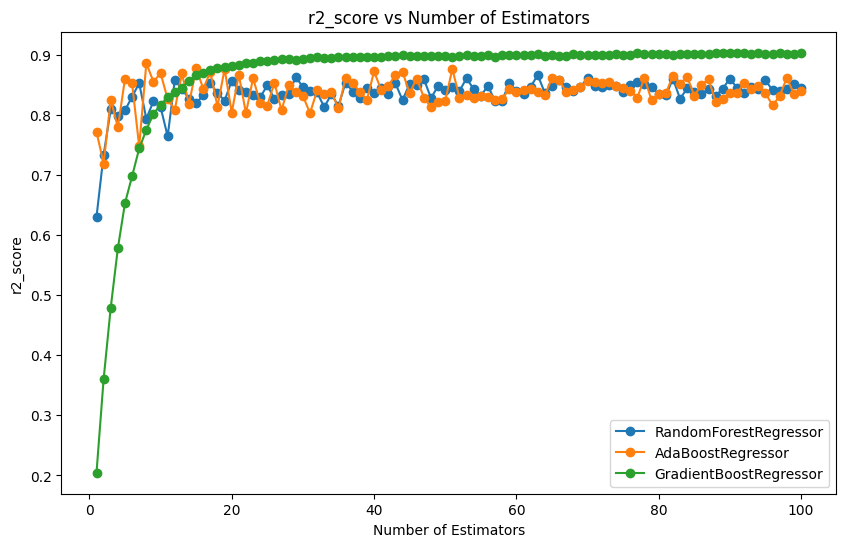

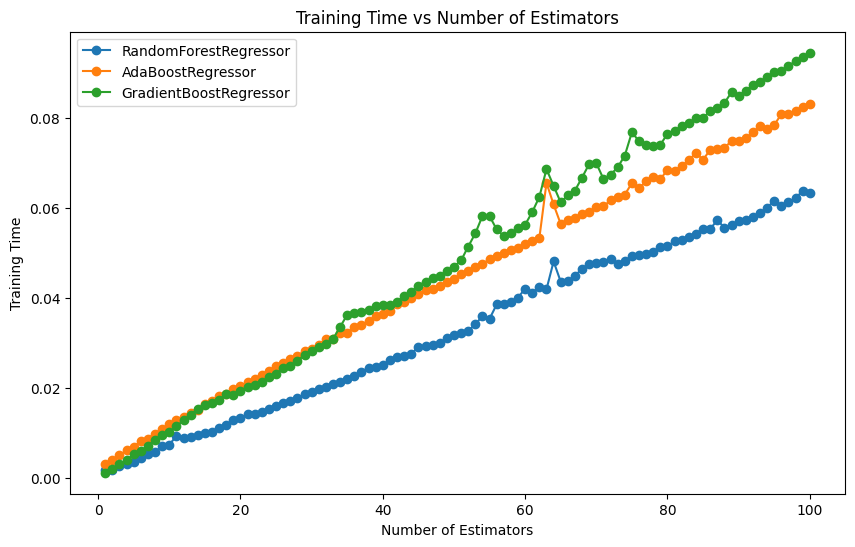

In [339]:
import time
import matplotlib.pyplot as plt

n_estimators=list(range(1,101))

r2_reg_rf=[]
training_time_reg_rf=[]

for n_estimator in n_estimators:
    random_forest = RandomForestRegressor(n_estimators=n_estimator)
    start=time.time()
    random_forest.fit(X_train_reg, y_train_reg)
    end=time.time()
    predictions = random_forest.predict(X_test_reg)
    r2=r2_score(y_test_reg,predictions)
    r2_reg_rf.append(r2)
    training_time_reg_rf.append(end-start)

r2_reg_ada=[]
training_time_reg_ada=[]

for n_estimator in n_estimators:
    adaboost_regressor = AdaBoostRegressor(n_estimators=n_estimator)
    start=time.time()
    adaboost_regressor.fit(X_train_reg, y_train_reg)
    end=time.time()
    predictions = adaboost_regressor.predict(X_test_reg)
    r2=r2_score(y_test_reg,predictions)
    r2_reg_ada.append(r2)
    training_time_reg_ada.append(end-start)

r2_reg_gb=[]
training_time_reg_gb=[]

for n_estimator in n_estimators:
    gradientboost_regressor = GradientBoostedDecisionTreeRegressor(n_estimators=n_estimator)
    start=time.time()
    gradientboost_regressor.fit(X_train_reg, y_train_reg)
    end=time.time()
    predictions = gradientboost_regressor.predict(X_test_reg)
    r2=r2_score(y_test_reg,predictions)
    r2_reg_gb.append(r2)
    training_time_reg_gb.append(end-start)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, r2_reg_rf, label='RandomForestRegressor', marker='o')
plt.plot(n_estimators, r2_reg_ada, label='AdaBoostRegressor', marker='o')
plt.plot(n_estimators, r2_reg_gb, label='GradientBoostRegressor', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('r2_score')
plt.title('r2_score vs Number of Estimators')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, training_time_reg_rf, label='RandomForestRegressor', marker='o')
plt.plot(n_estimators, training_time_reg_ada, label='AdaBoostRegressor', marker='o')
plt.plot(n_estimators, training_time_reg_gb, label='GradientBoostRegressor', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Number of Estimators')
plt.legend()
plt.show()


Feature Similarity:<br>
All models appear to make false positive errors, instances where there are high values seem to be one of the reason for incorrect label prediction.<br>
The models also share similarities in false negative errors, features such as most frequent ones appear to be influential in contributing to false negatives across all models.<br><br>
Feature Patterns:<br>
Specific combinations of features while training appear to give wrong predictions.<br>
The models appear to underestimate or overestimate some of the features.